In [20]:
import numpy as np
x = np.array([80, 65, 95, 95, 85, 75, 90, 65])  # Attendance
x2 = np.array([75, 70, 85, 100, 65, 55, 90, 80]) # Homework
y = np.array([1, 0, 1, 1, 0 , 0, 1, 1]) # Pass


# Separamos los conjuntos por prueba y entrenamiento
x_1 = x[0:6]
x_1v = x[6:8]
x2_1 = x2[0:6]
x2_v = x2[6:8]
y_t = y[0:6]
y_v = y[6:8]

## Algoritmo de regresión logística con columna Attendance



Para la inicialización de nuestros valores $\theta$, nos basamos en la inicialización de Xavier-Glorot : https://www.tensorflow.org/api_docs/python/tf/keras/initializers/GlorotNormal

In [21]:
import tensorflow as tf
tf.random.set_seed(24)
initializer = tf.keras.initializers.GlorotNormal()
values = initializer(shape=(2, 1))
n = x_1.size
values

<tf.Tensor: shape=(2, 1), dtype=float32, numpy=
array([[-0.3368601 ],
       [ 0.44546065]], dtype=float32)>

## Crearemos un grid search para encontrar el $\alpha$ óptimo dentro de un rango.

In [22]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(200000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))
        delta = h_0 - y_t
        delta_x1 = delta * x_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x1)


        costo = - np.mean(y_t * np.log(h_0+1e-20) + (1 - y_t) * np.log(1 - h_0+1e-20)) # Calculamos costo con cross entropy
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-22-48aeb138cf6a>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1)))


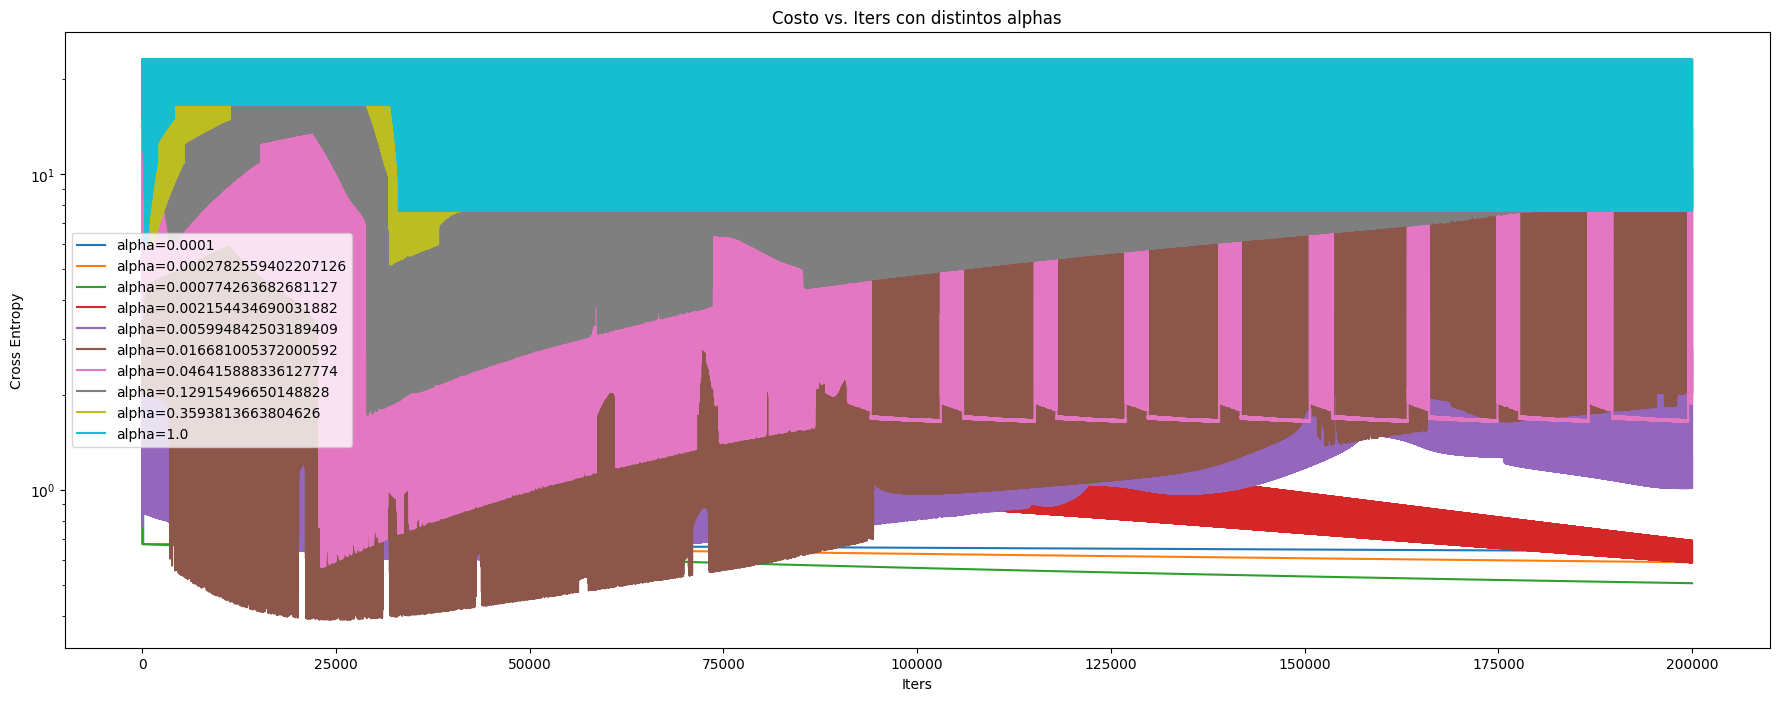

Learning Rate: 0.0001
  Costo Final: 0.639446
  theta_0: -1.173467, theta_1: 0.016175

Learning Rate: 0.0003
  Costo Final: 0.590172
  theta_0: -2.497633, theta_1: 0.031991

Learning Rate: 0.0008
  Costo Final: 0.506723
  theta_0: -5.358930, theta_1: 0.066185

Learning Rate: 0.0022
  Costo Final: 0.689933
  theta_0: -14.392261, theta_1: 0.154966

Learning Rate: 0.0060
  Costo Final: 1.281802
  theta_0: -42.648201, theta_1: 0.444593

Learning Rate: 0.0167
  Costo Final: 2.662796
  theta_0: -108.048444, theta_1: 1.459885

Learning Rate: 0.0464
  Costo Final: 23.005876
  theta_0: -163.971789, theta_1: 3.300912

Learning Rate: 0.1292
  Costo Final: 10.348416
  theta_0: -800.875185, theta_1: 7.447480

Learning Rate: 0.3594
  Costo Final: 23.025851
  theta_0: -2083.975585, theta_1: 22.324943

Learning Rate: 1.0000
  Costo Final: 23.025851
  theta_0: -5838.844971, theta_1: 99.636018



In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('Cross Entropy')
plt.legend()
plt.yscale('log')

plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 0.0008$ muestra los mejores resultados. En este caso, utilizaremos el $\alpha = 0.0008.$

In [24]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [25]:
# Extraemos solo los de alpha = 0.0008
theta_0 = x_theta_0[2]
theta_1 = x_theta_1[2]
print(theta_0, theta_1)

-5.358929931106775 0.0661851309696551


In [26]:
y_pred = []
for i in range(0, len(x_1v)):
  y_i = 1 / (1 + np.exp(-(theta_0 + theta_1 * x_1v[i])))
  y_i = 1/(1 + np.exp(-(theta_0 + theta_1*x_1v[i])))
  y_pred.append(round(y_i))
  costo = - np.mean(y_i * np.log(h_0+1e-10) + (1 - y_i) * np.log(1 - h_0+1e-10))
  print(f'Costo{i+1} : {costo}')

Costo1 : 14.854833443057503
Costo2 : 5.938436028218657


In [27]:
y_pred

[1, 0]

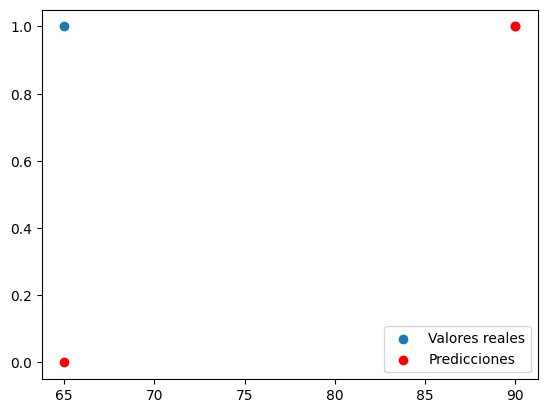

In [28]:
import matplotlib.pyplot as plt
plt.scatter(x_1v, y_v)
plt.scatter(x_1v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [29]:
# Scores
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1

Accuracy = (true_pos + true_neg) / len(y_v)

if (true_pos + false_pos) == 0:
    Precision = 0
else:
    Precision = true_pos / (true_pos + false_pos)

if (true_pos + false_neg) == 0:
    Recall = 0
else:
    Recall = true_pos / (true_pos + false_neg)
if (Precision + Recall) == 0:
    F_1 = 0
else:
    F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 0.5 
Precision: 1.0 
Recall: 0.5 
F_1 Score: 0.6666666666666666


# Algoritmo de regresión logística con columna Homework

Se hará exactamente lo mismo que anteriormente, pero ahora con la columna Homework

In [30]:
learning_rates = np.logspace(-4, 0, 10)  # Se crean 10 valores logarítimicos entre 10e-4 a 1
resultados = [] # Aquí presentaremos nuestros resultados
for alpha in learning_rates: # Probaremos con cada alpha

  # Jalamos los pesos del inicializador
    theta_0 = (values[0].numpy())[0]
    theta_1 = (values[1].numpy())[0]
    costos = [] # Creamos la lista de los costos

  # Nuestro Algoritmo de Gradiente Descendente

    for i in range(200000):
    # Definimos nuestra función h_0, nuestra delta y nuestra delta * x1
        h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))
        delta = h_0 - y_t
        delta_x2 = delta * x2_1

    # Actualizamos nuestros pesos
        theta_0 -= alpha * (1/n) * np.sum(delta)
        theta_1 -= alpha * (1/n) * np.sum(delta_x2)


        costo = - np.mean(y_t * np.log(h_0+1e-20) + (1 - y_t) * np.log(1 - h_0+1e-20))   # Calculamos costo con Cross Entropy
        costos.append(costo) # Agregamos el costo a la lista de los costos

# Adjuntamos los valores relevantes encontrados con alpha
    resultados.append({
        "learning_rate": alpha,
        "costo_final": costos[-1],
        "theta_0": theta_0,
        "theta_1": theta_1,
        "costos": costos
    })

<ipython-input-30-87a70091de66>:14: RuntimeWarning: overflow encountered in exp
  h_0 = 1 / (1 + np.exp(-(theta_0 + theta_1 * x2_1)))


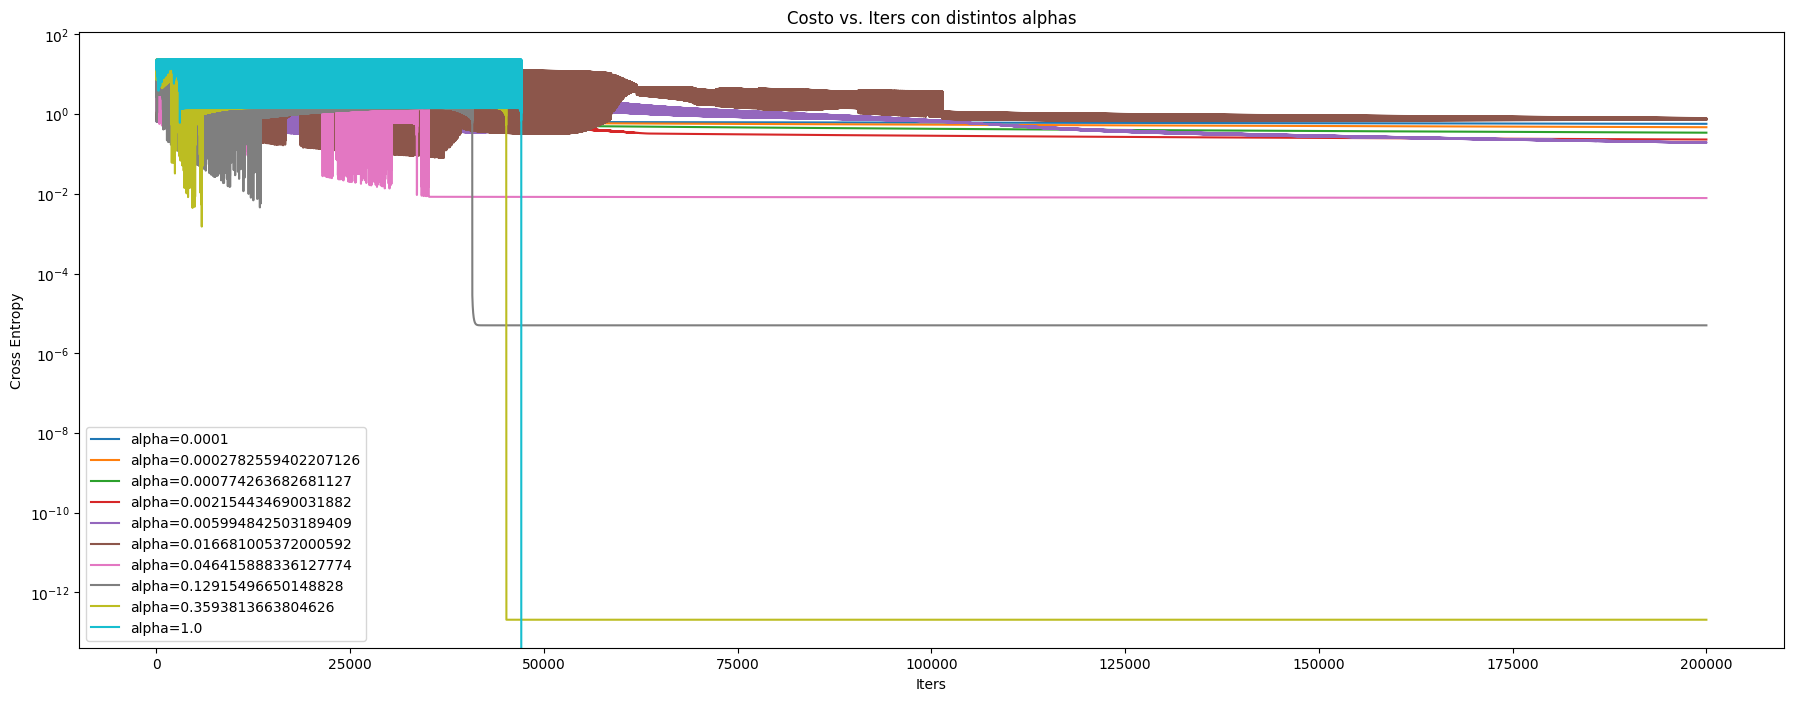

Learning Rate: 0.0001
  Costo Final: 0.568277
  theta_0: -1.667252, theta_1: 0.025621

Learning Rate: 0.0003
  Costo Final: 0.467133
  theta_0: -3.560264, theta_1: 0.050422

Learning Rate: 0.0008
  Costo Final: 0.340474
  theta_0: -7.064304, theta_1: 0.097168

Learning Rate: 0.0022
  Costo Final: 0.229620
  theta_0: -12.864715, theta_1: 0.176237

Learning Rate: 0.0060
  Costo Final: 0.192287
  theta_0: -33.320992, theta_1: 0.482479

Learning Rate: 0.0167
  Costo Final: 0.719187
  theta_0: -88.072242, theta_1: 1.111223

Learning Rate: 0.0464
  Costo Final: 0.007813
  theta_0: -108.498040, theta_1: 1.497008

Learning Rate: 0.1292
  Costo Final: 0.000005
  theta_0: -322.020810, theta_1: 4.442142

Learning Rate: 0.3594
  Costo Final: 0.000000
  theta_0: -943.308888, theta_1: 13.084220

Learning Rate: 1.0000
  Costo Final: -0.000000
  theta_0: -2682.295360, theta_1: 36.908077



In [31]:
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 8)) # Graficamos los resultados

for result in resultados:
    plt.plot(result["costos"], label=f"alpha={result['learning_rate']}")

plt.title('Costo vs. Iters con distintos alphas')
plt.xlabel('Iters')
plt.ylabel('Cross Entropy')
plt.legend()
plt.yscale('log')

plt.show()

for result in resultados: # Mostramos los resultados finales
    print(f"Learning Rate: {result['learning_rate']:.4f}")
    print(f"  Costo Final: {result['costo_final']:.6f}")
    print(f"  theta_0: {result['theta_0']:.6f}, theta_1: {result['theta_1']:.6f}\n")

 Observamos que el gráfico con $\alpha = 1$ da un resultado de un costo final negativo. Esto indica que se volvió inestable, y en vez de converger, divirgió. En este caso, utilizaremos el $\alpha = 0.3594$, el cual dio mejores resultados.

In [32]:
# Guardaremos todos los pesos
x_theta_0 = []
x_theta_1 = []
for result in resultados:
  x_theta_0.append(result['theta_0'])
  x_theta_1.append(result['theta_1'])

In [33]:
# Extraemos solo los de alpha = 0.3594
theta_0 = x_theta_0[-2]
theta_1 = x_theta_1[-2]
print(theta_0, theta_1)

-943.3088877900116 13.084219770908652


In [34]:
y_pred = []
for i in range(0, len(x2_v)):
  y_i = 1/(1 + np.exp(-(theta_0 + theta_1*x2_v[i])))
  y_pred.append(round(y_i))
  costo = - np.mean(y_i * np.log(h_0+1e-20) + (1 - y_i) * np.log(1 - h_0+1e-20))
  print(f'Costo{i+1} : {costo}')

Costo1 : 23.025850929940457
Costo2 : 23.025850929940457


In [35]:
y_pred

[1, 1]

In [36]:
len(y_v)

2

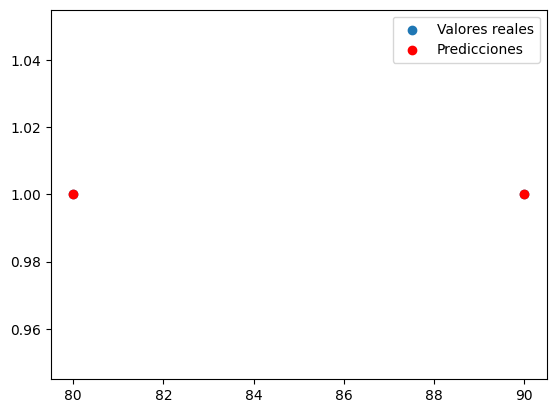

In [37]:
import matplotlib.pyplot as plt
plt.scatter(x2_v, y_v)
plt.scatter(x2_v, y_pred, color='red')
plt.legend(['Valores reales', 'Predicciones'], loc = 'best')

Observamos que se predicen correctamente los dos valores.

In [38]:
true_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] == y_v[i]: true_pos +=1

true_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] == y_v[i]: true_neg +=1

false_pos = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 1 and y_pred[i] != y_v[i]: false_pos +=1


false_neg = 0
for i in range(0, len (y_pred)):
  if y_pred[i] == 0 and y_pred[i] != y_v[i]: false_neg +=1

Accuracy = (true_pos + true_neg) / len(y_v)

if (true_pos + false_pos) == 0:
    Precision = 0
else:
    Precision = true_pos / (true_pos + false_pos)

if (true_pos + false_neg) == 0:
    Recall = 0
else:
    Recall = true_pos / (true_pos + false_neg)
if (Precision + Recall) == 0:
    F_1 = 0
else:
    F_1 = (2 * Precision * Recall) / (Precision + Recall)
print('Accuracy:', Accuracy, '\nPrecision:', Precision, '\nRecall:', Recall, '\nF_1 Score:',F_1)

Accuracy: 1.0 
Precision: 1.0 
Recall: 1.0 
F_1 Score: 1.0
